# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [289]:
import pandas as pd
#Import Iris dataset
Iris = pd.read_csv("Iris-1.csv")
Iris.dtypes
#Print 10 random samples from the dataset
print(Iris.sample(10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
142  143            5.8           2.7            5.1           1.9   
78    79            6.0           2.9            4.5           1.5   
79    80            5.7           2.6            3.5           1.0   
117  118            7.7           3.8            6.7           2.2   
57    58            4.9           2.4            3.3           1.0   
64    65            5.6           2.9            3.6           1.3   
125  126            7.2           3.2            6.0           1.8   
8      9            4.4           2.9            1.4           0.2   
87    88            6.3           2.3            4.4           1.3   
17    18            5.1           3.5            1.4           0.3   

             Species  
142   Iris-virginica  
78   Iris-versicolor  
79   Iris-versicolor  
117   Iris-virginica  
57   Iris-versicolor  
64   Iris-versicolor  
125   Iris-virginica  
8        Iris-setosa  
87   Iris-versicolor  

## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [290]:
#Identifying the missing values - check using info() or isnull()
Iris.info() #method1
Iris.isnull() #method2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


Fill missing values with median of that particular column

In [291]:
#If any missing values are found, replace it with median
Iris.fillna(Iris.median())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Question 3

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [292]:
#drop id column
Iris.drop(columns='Id',inplace=True)
#pre-print Species before converting it into Labels
#########print(Iris['Species'].head(10))
# for df['Species'] use LableEncoder() to convert it to number to start with
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
Iris['Species'] = label_encoder.fit_transform(Iris['Species'])
########print(Iris['Species'].head(10))
########print(Iris['Species'].tail(10))
#Iris.info()
#Find the correlation ranges
#print(Iris.corr()['Species'])
#print(Iris.loc[:,(Iris.corr()['Species'] > -0.1)&(Iris.corr()['Species'] < 0.1)])
Iris.drop(Iris.loc[:,(Iris.corr()['Species'] > -0.1)&(Iris.corr()['Species'] < 0.1)],inplace=True)
Iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


In [293]:
#Working sample
#print(Iris.corr()['Species'])
#Iris.loc[:,Iris.corr()['Species'] > 0.95]
#Iris.drop(Iris.loc[:,Iris.corr()['Species'] > 0.95],inplace=True, axis=1)
#Iris.info()

### Question 4

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [294]:
Iris.var()
#print(Iris.var()<0.1)
Iris.drop(Iris.loc[:,Iris.var()<0.1],inplace=True,axis=1)
#Iris.info()

In [295]:
Iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Question 5

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


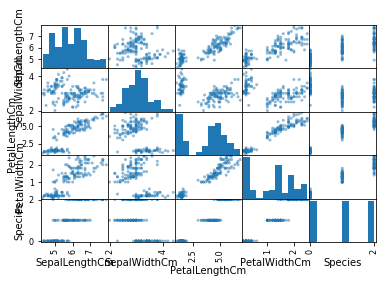

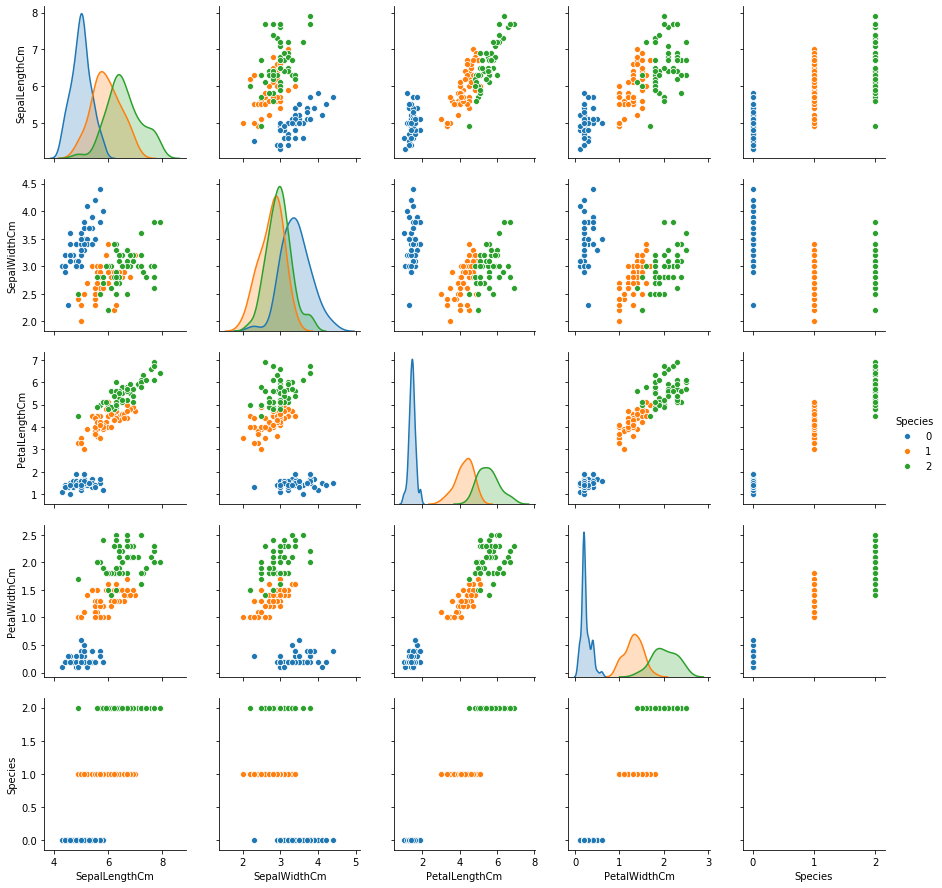

In [296]:
%matplotlib inline
pd.plotting.scatter_matrix(Iris, alpha=0.5) #method 1
#method 2
import seaborn as sns
sns.pairplot(Iris,hue='Species')

## Build Model

### Question 6

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [297]:
Iris.shape

(150, 5)

In [298]:
# Import necessary modules for Module Building
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [299]:
#Features and Labels definition
Y = Iris.Species
X = Iris.drop('Species',axis=1)
print(Y.shape)
print(X.shape)

(150,)
(150, 4)


In [300]:
#x_train,x_test,y_train,y_test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30)
X_train.count()
X_test.count()
#print - training shape
print(X_train.shape)
#print - test shape
print(X_test.shape)

(105, 4)
(45, 4)


In [301]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#sc=StandardScaler()
for k in [3,5,9]:
    print("For K=",k,":")
    knn=KNeighborsClassifier(n_neighbors=k)
 #   sc.fit(X_train)
 #   scaledX_train = sc.transform(X_train)
 #   scaledX_test = sc.transform(X_test)
    knn.fit(X_train,Y_train)
    #train accuracy ==> knn.score(it internally fits,predicts and find accuracy)
    Y_train_pred = knn.predict(X_train)
    print("Accuracy score for training: ", accuracy_score(Y_train,Y_train_pred))
    Y_test_pred = knn.predict(X_test)
    print("Accuracy score for testing: ", accuracy_score(Y_test,Y_test_pred))

For K= 3 :
Accuracy score for training:  0.9619047619047619
Accuracy score for testing:  0.9777777777777777
For K= 5 :
Accuracy score for training:  0.9809523809523809
Accuracy score for testing:  0.9555555555555556
For K= 9 :
Accuracy score for training:  0.9714285714285714
Accuracy score for testing:  0.9555555555555556


# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [302]:
bc2 = pd.read_csv("bc2.csv")
bc2.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [303]:
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [304]:
bc2.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [305]:
print(bc2.isnull().sum())

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [306]:
bc2['Bare Nuclei'].value_counts()['?'] #for ?

16

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [307]:
top = bc2.describe(include='all')['Bare Nuclei'].top
print("top: ",top)
bc2.replace(to_replace = '?', value = top, inplace=True)
bc2['Bare Nuclei'].value_counts()

top:  1


1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Question 5
#### Find the distribution of target variable (Class) 

In [308]:
bc2['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

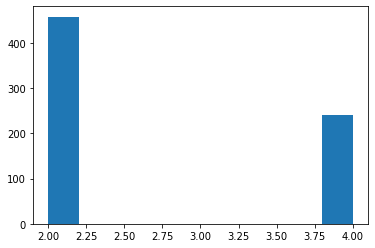

In [309]:
bc2['Class'].hist(grid=False)

#### Convert the datatype of Bare Nuclei to `int`

In [310]:
bc2['Bare Nuclei'] = bc2['Bare Nuclei'].astype('int64')
bc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

                             ClumpThickness  Cell Size  Cell Shape  \
ClumpThickness                     1.000000   0.644913    0.654589   
Cell Size                          0.644913   1.000000    0.906882   
Cell Shape                         0.654589   0.906882    1.000000   
Marginal Adhesion                  0.486356   0.705582    0.683079   
Single Epithelial Cell Size        0.521816   0.751799    0.719668   
Bare Nuclei                        0.590008   0.686673    0.707474   
Normal Nucleoli                    0.558428   0.755721    0.735948   
Bland Chromatin                    0.535835   0.722865    0.719446   
Mitoses                            0.350034   0.458693    0.438911   
Class                              0.716001   0.817904    0.818934   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ClumpThickness                        0.486356                     0.521816   
Cell Size                             0.705582                     0.75

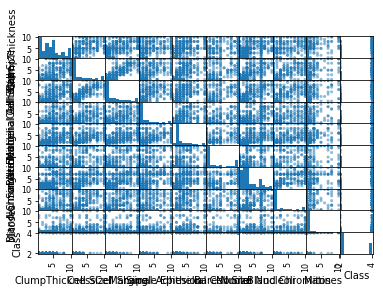

In [311]:
bc2.drop(columns='ID',inplace=True)
%matplotlib inline
pd.plotting.scatter_matrix(bc2)

print(bc2.corr())

corr_matrix = bc2.corr().abs()

#Select upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#find features with high correlation ( > 0.90; Assumption)
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print(to_drop, "can be dropped")

## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [312]:
#Features and Labels definition
Y = bc2.Class
X = bc2.drop('Class',axis=1)
print(Y.shape)
print(X.shape)

(699,)
(699, 9)


#### Divide the Training and Test sets in 70:30 

In [313]:
#x_train,x_test,y_train,y_test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30)
X_train.count()
X_test.count()
#print - training shape
print(X_train.shape)
#print - test shape
print(X_test.shape)

(489, 9)
(210, 9)


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [314]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [315]:
from sklearn.metrics import accuracy_score
for k in [3,5,9]:
    print("For K=",k,":")
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,Y_train)
    Y_train_pred = knn.predict(scaledX_train)
    print("Accuracy score for training: ", accuracy_score(Y_train,Y_train_pred))
    Y_test_pred = knn.predict(scaledX_test)
    print("Accuracy score for testing: ", accuracy_score(Y_test,Y_test_pred))

For K= 3 :
Accuracy score for training:  0.9754601226993865
Accuracy score for testing:  0.9666666666666667
For K= 5 :
Accuracy score for training:  0.9734151329243353
Accuracy score for testing:  0.9666666666666667
For K= 9 :
Accuracy score for training:  0.967280163599182
Accuracy score for testing:  0.9761904761904762
